# 📈 Stock Market Forecasting & Decision Support System

## Objective
This project aims to build an end-to-end time series forecasting system using LSTM
to predict stock prices and generate actionable Buy / Hold / Sell signals.

## Why this project?
Retail investors often struggle to determine the right timing for market entry.
This project demonstrates how machine learning can assist decision-making
by combining forecasting, evaluation, and risk awareness.

⚠️ This project is for educational purposes only.


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

import yfinance as yf


# **Load Stock Data**

In [35]:
def load_stock_data(ticker, start_date="2018-01-01"):
    df = yf.download(ticker, start=start_date, progress=False)

    if df.empty:
        raise ValueError("No data found. Check ticker symbol.") #Jika pengguna salah mengetik simbol (misal: 'APPPLE' bukan 'AAPL'), variabel df akan kosong

    df = df[['Close']]
    df.dropna(inplace=True) #menghapus kolom NaN
    return df


In [36]:
df = load_stock_data("BBCA.JK", "2018-01-01")
df.tail()


/tmp/ipython-input-3983532900.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, progress=False)


Price,Close
Ticker,BBCA.JK
Date,
2025-12-26,8025.0
2025-12-29,8025.0
2025-12-30,8075.0
2025-12-31,8075.0
2026-01-02,8025.0


In [37]:
print("Last available date:", df.index.max().date())


Last available date: 2026-01-02


# **Exploratory Data Analysis (EDA)**

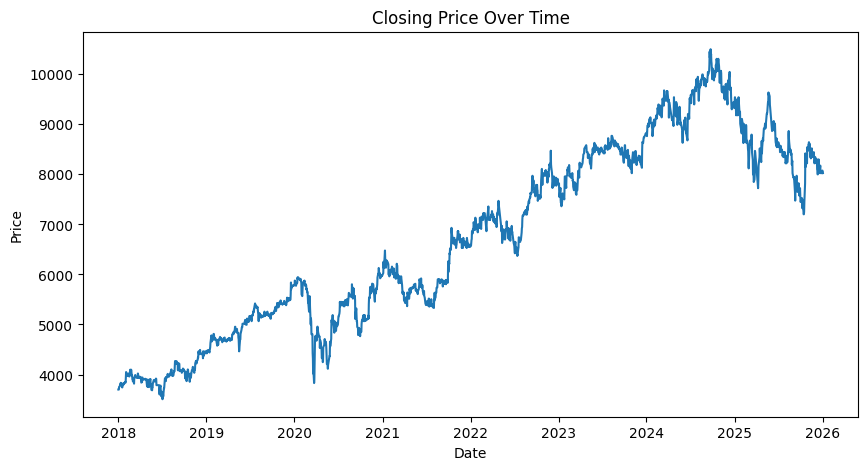

In [38]:
plt.figure(figsize=(10,5))
plt.plot(df['Close'])
plt.title("Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()


The stock price shows clear trend and volatility patterns,
indicating the need for sequence-based modeling such as LSTM.


# **Data Scaling**

In [39]:
scaler = MinMaxScaler(feature_range=(0,1))

scaled_data = scaler.fit_transform(df)



MinMaxScaler digunakan untuk menormalisasikan nilai harga yang mana sangat krusial untuk pelatihan LSTM

# **Create Time Series Sequences**

In [40]:
def create_sequences(data, window_size=60):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data)
X = X.reshape((X.shape[0], X.shape[1], 1))


# **Splitting Data**

In [24]:
total_size = len(X)

train_size = int(0.7 * total_size)
val_size = int(0.15 * total_size)

X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size + val_size], y[train_size:train_size + val_size]
X_test, y_test = X[train_size + val_size:], y[train_size + val_size:]

print(f"Train: {len(X_train)} samples")
print(f"Validation: {len(X_val)} samples")
print(f"Test: {len(X_test)} samples")



Train: 1336 samples
Validation: 286 samples
Test: 287 samples


## Data Splitting Strategy

The dataset is split sequentially into:
- 70% Training data
- 15% Validation data
- 15% Test data

This approach preserves temporal order and avoids data leakage,
which is critical for time series forecasting.


# **LSTM MODEL**

In [41]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [42]:
model = Sequential([
    LSTM(50, return_sequences=False, input_shape=(X_train.shape[1], 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [43]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)


Epoch 1/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0753 - val_loss: 0.0013
Epoch 2/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 5.8023e-04 - val_loss: 0.0013
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 5.3886e-04 - val_loss: 0.0012
Epoch 5/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 5.4156e-04 - val_loss: 0.0014
Epoch 6/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 5.3863e-04 - val_loss: 0.0012
Epoch 7/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 5.8374e-04 - val_loss: 0.0014
Epoch 8/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.7934e-04 - val_loss: 0.0012
Epoch 9/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 5.1170e-04 - val_loss: 0.0012
Epoch 10/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 5.1030e-04 - val_loss: 0.0011
Epoch 11/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.5694e-04 - val_loss: 0.0011
Epoch 12/20
48/48 ━━━━━━━━━

# **Prediction & Inverse Scaling**

In [44]:
pred_scaled = model.predict(X_test)
pred = scaler.inverse_transform(pred_scaled)
actual = scaler.inverse_transform(y_test.reshape(-1,1))


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step


In [45]:
rmse = np.sqrt(mean_squared_error(actual, pred))
mae = mean_absolute_error(actual, pred)

rmse, mae


(np.float64(210.91681620500455), 166.30399598126635)

## Model Evaluation

The model achieves:
- RMSE ≈ Rp210
- MAE ≈ Rp166

This indicates that the average daily prediction error is below 2% of the stock price,
which is reasonable given the inherent volatility of financial time series.


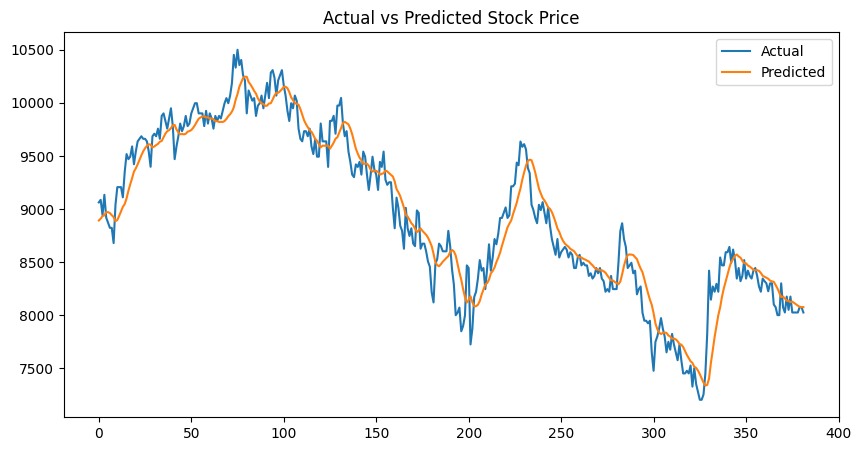

In [46]:
plt.figure(figsize=(10,5))
plt.plot(actual, label="Actual")
plt.plot(pred, label="Predicted")
plt.legend()
plt.title("Actual vs Predicted Stock Price")
plt.show()


In [47]:
last_actual = actual[-1][0]
last_pred = pred[-1][0]
expected_return = (last_pred - last_actual) / last_actual

if expected_return > 0.05:
    signal = "BUY"
elif expected_return < -0.05:
    signal = "SELL"
else:
    signal = "HOLD"

signal, expected_return


('HOLD', np.float64(0.006296728971962502))

The signal is generated based on expected return thresholds.
This transforms predictions into actionable insights.


In [48]:
df['MA_7'] = df['Close'].rolling(window=7).mean()
df['MA_14'] = df['Close'].rolling(window=14).mean()
df['MA_30'] = df['Close'].rolling(window=30).mean()


In [49]:
def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)

    avg_gain = gain.rolling(period).mean()
    avg_loss = loss.rolling(period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df['RSI'] = compute_rsi(df['Close'])


In [50]:
df['Volatility'] = df['Close'].pct_change().rolling(14).std()


In [51]:
df_ind = df.dropna().copy()
df_ind.tail()


Price,Close,MA_7,MA_14,MA_30,RSI,Volatility
Ticker,BBCA.JK,,,,,
Date,,,,,,
2025-12-26,8025.0,8071.428571,8096.428571,8231.035286,40.350877,0.017420
2025-12-29,8025.0,8071.428571,8076.785714,8219.546224,40.350877,0.017420
2025-12-30,8075.0,8057.142857,8075.000000,8204.756673,49.019608,0.016349
2025-12-31,8075.0,8060.714286,8075.000000,8195.762142,50.000000,0.016327
2026-01-02,8025.0,8039.285714,8076.785714,8182.617383,51.020408,0.016210


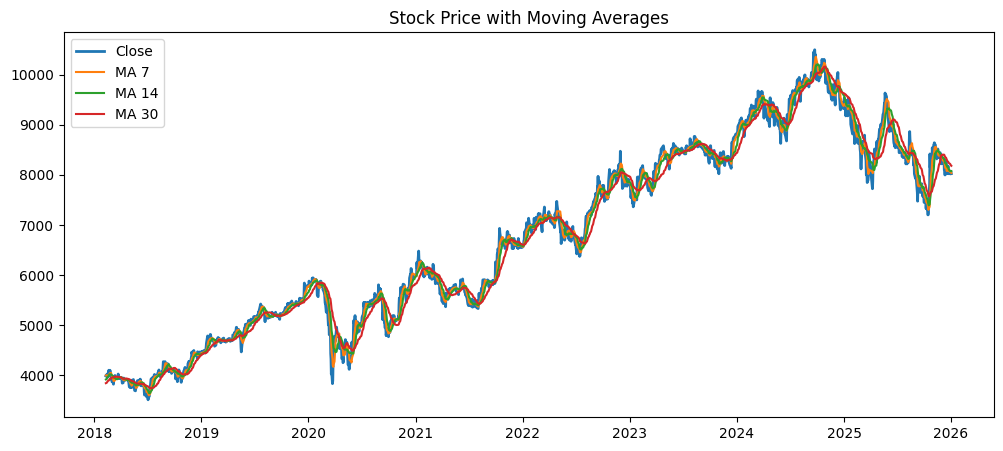

In [52]:
plt.figure(figsize=(12,5))
plt.plot(df_ind['Close'], label='Close', linewidth=2)
plt.plot(df_ind['MA_7'], label='MA 7')
plt.plot(df_ind['MA_14'], label='MA 14')
plt.plot(df_ind['MA_30'], label='MA 30')
plt.legend()
plt.title("Stock Price with Moving Averages")
plt.show()


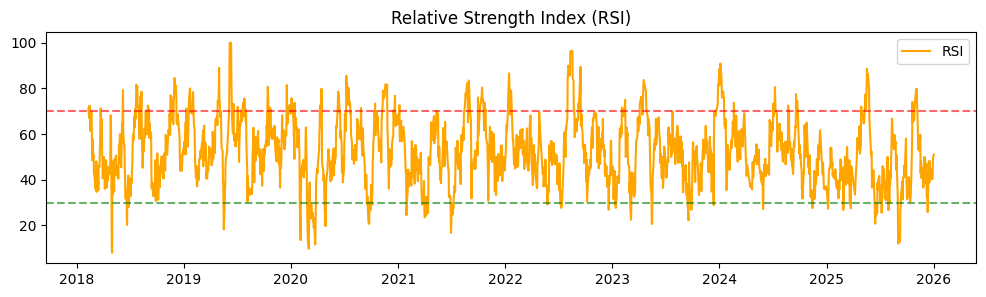

In [53]:
plt.figure(figsize=(12,3))
plt.plot(df_ind['RSI'], label='RSI', color='orange')
plt.axhline(70, linestyle='--', color='red', alpha=0.6)
plt.axhline(30, linestyle='--', color='green', alpha=0.6)
plt.title("Relative Strength Index (RSI)")
plt.legend()
plt.show()


In [54]:
latest_rsi = df_ind['RSI'].iloc[-1]
latest_vol = df_ind['Volatility'].iloc[-1]


In [55]:
if expected_return > 0.02 and latest_rsi < 70:
    signal = "BUY"
elif expected_return < -0.02 and latest_rsi > 30:
    signal = "SELL"
else:
    signal = "HOLD"

signal, expected_return, latest_rsi


('HOLD', np.float64(0.006296728971962502), np.float64(51.020408163265316))

## Decision Logic (ML + Technical Analysis)

The final trading signal is generated using a hybrid approach:

- LSTM predicts the next-day stock price
- Expected return is computed from prediction
- RSI is used to confirm momentum conditions

Decision Rules:
- BUY: Positive expected return with RSI below overbought level
- SELL: Negative expected return with RSI above oversold level
- HOLD: Uncertain conditions

This approach improves interpretability and reduces false signals
compared to pure price-based prediction.


In [56]:
window_size = X.shape[1]  # biasanya 60

last_window = scaled_data[-window_size:].copy()
last_window.shape


(60, 1)

In [57]:
def rolling_forecast(model, last_window, scaler, horizon=7):
    forecasts = []
    current_window = last_window.copy()

    for _ in range(horizon):
        # reshape ke format LSTM
        X_input = current_window.reshape(1, window_size, 1)

        # prediksi 1 hari ke depan (scaled)
        next_pred_scaled = model.predict(X_input, verbose=0)[0][0]

        # simpan hasil
        forecasts.append(next_pred_scaled)

        # geser window
        current_window = np.vstack([
            current_window[1:],
            [[next_pred_scaled]]
        ])

    # inverse scaling ke harga asli
    forecasts = scaler.inverse_transform(
        np.array(forecasts).reshape(-1, 1)
    )

    return forecasts


In [58]:
forecast_7d = rolling_forecast(
    model=model,
    last_window=last_window,
    scaler=scaler,
    horizon=7
)

forecast_7d


array([[8069.6577],
       [8070.2354],
       [8071.734 ],
       [8074.0127],
       [8076.821 ],
       [8079.988 ],
       [8083.4043]], dtype=float32)

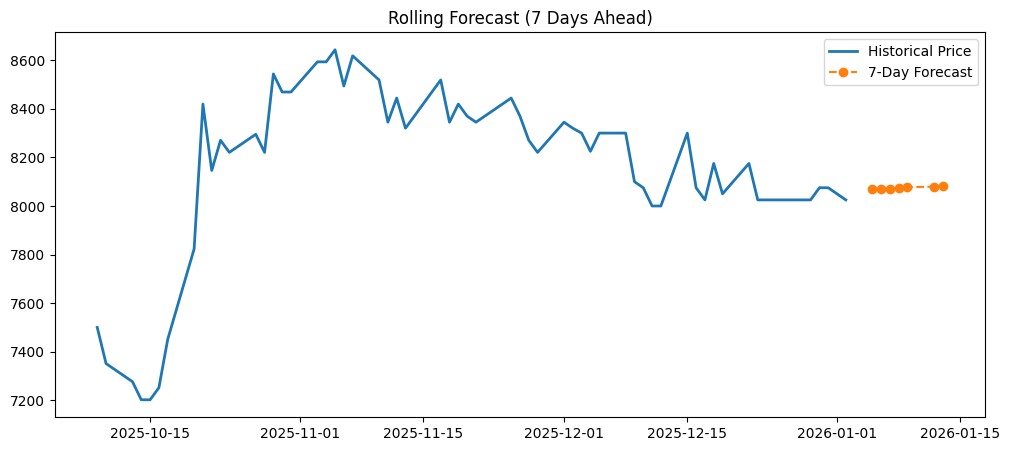

In [59]:
plt.figure(figsize=(12,5))

# plot data historis terakhir
plt.plot(
    df_ind['Close'].iloc[-60:],
    label="Historical Price",
    linewidth=2
)

# plot forecast
future_dates = pd.date_range(
    start=df_ind.index[-1],
    periods=len(forecast_7d)+1,
    freq='B'
)[1:]

plt.plot(
    future_dates,
    forecast_7d.flatten(),
    linestyle='--',
    marker='o',
    label="7-Day Forecast"
)

plt.legend()
plt.title("Rolling Forecast (7 Days Ahead)")
plt.show()


In [60]:
expected_return_7d = (
    forecast_7d[-1][0] - last_actual
) / last_actual

expected_return_7d


np.float64(0.00727779400311515)